# Working with Stock Market Data

### Download data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [10]:
prices = (yf.download(
    tickers="AAPL",
    start="2000-01-01",
    end="2023-12-31",
    ignore_tz=True,
    progress=False
)
.reset_index()
.assign(symbol="AAPL")
.rename(columns={
    "Date": "date",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Adj Close": "adjusted",
    "Volume": "volume"}
    )
)
prices.head().round(4)

,date,open,high,low,close,adjusted,volume,symbol
0,2000-01-03,0.9364,1.0045,0.9079,0.9994,0.8461,535796800,AAPL
1,2000-01-04,0.9665,0.9877,0.9035,0.9152,0.7748,512377600,AAPL
2,2000-01-05,0.9263,0.9872,0.9196,0.9286,0.7861,778321600,AAPL
3,2000-01-06,0.9475,0.9554,0.8482,0.8482,0.7181,767972800,AAPL
4,2000-01-07,0.8616,0.9018,0.8527,0.8884,0.7521,460734400,AAPL


### Plot data

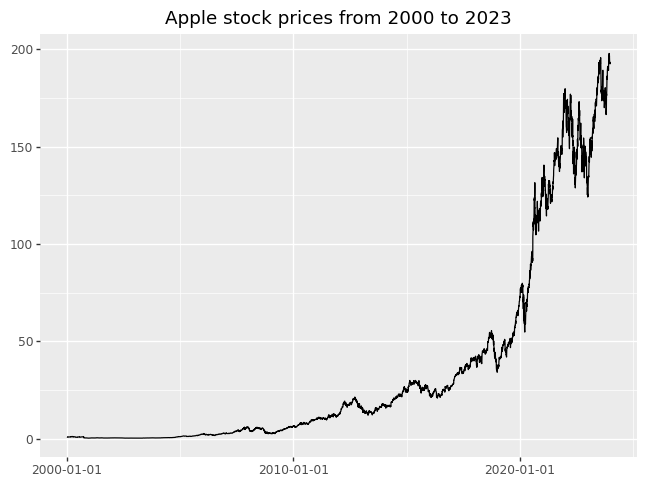

In [5]:
from plotnine import *
prices_figure = (
    ggplot(prices, aes(y="adjusted", x="date")) +
    geom_line() +
    labs(x="", y="",
         title="Apple stock prices from 2000 to 2023")
)
prices_figure.draw()

### Daily returns

In [12]:
# returns percentage change
returns = (prices
    .sort_values("date")
    .assign(ret=lambda x: x["adjusted"].pct_change())
    .get(["symbol", "date", "ret"])
)
returns = returns.dropna()
returns.head().round(4)

,symbol,date,ret
1,AAPL,2000-01-04,-0.0843
2,AAPL,2000-01-05,0.0146
3,AAPL,2000-01-06,-0.0865
4,AAPL,2000-01-07,0.0474
5,AAPL,2000-01-10,-0.0176


### Five percent quantile VaR

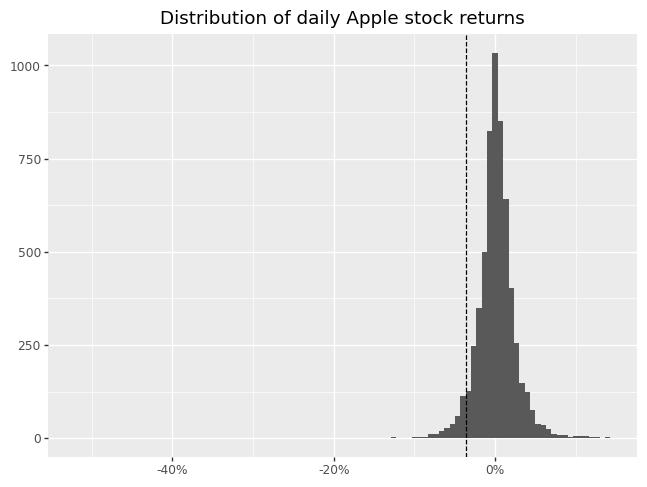

In [14]:
from mizani.formatters import percent_format
quantile_05 = returns["ret"].quantile(0.05)

returns_figure = (
    ggplot(returns, aes(x="ret")) +
    geom_histogram(bins=100) +
    geom_vline(aes(xintercept=quantile_05),
               linetype="dashed") +
    labs(x="", y="",
         title="Distribution of daily Apple stock returns") +
    scale_x_continuous(labels=percent_format())
)
returns_figure.draw()

### Summary statistics

In [15]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,6036.0,0.001,0.025,-0.519,-0.01,0.001,0.013,0.139


In [ ]:
# Annualized
pd.DataFrame(returns["ret"]
    .groupby(returns["date"].dt.year)
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2000,251.0,-0.003,0.055,-0.519,-0.034,-0.002,0.027,0.137
2001,248.0,0.002,0.039,-0.172,-0.023,-0.001,0.027,0.129
2002,252.0,-0.001,0.031,-0.150,-0.019,-0.003,0.018,0.085
2003,252.0,0.002,0.023,-0.081,-0.012,0.002,0.015,0.113
2004,252.0,0.005,0.025,-0.056,-0.009,0.003,0.016,0.132
2005,252.0,0.003,0.024,-0.092,-0.010,0.003,0.017,0.091
2006,251.0,0.001,0.024,-0.063,-0.014,-0.002,0.014,0.118
2007,251.0,0.004,0.024,-0.070,-0.009,0.003,0.018,0.105
2008,253.0,-0.003,0.037,-0.179,-0.024,-0.001,0.019,0.139


# Scaling Up the Analysis